In [91]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [8]:
data.shape

(32560, 15)

In [9]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [12]:
data['Income']=le.fit_transform(data['Income'])

In [13]:
data['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [20]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [25]:
data['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [39]:
data['Native_country']=le.fit_transform(data['Native_country'])

In [26]:
data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [40]:
data['Workclass']=le.fit_transform(data['Workclass'])

In [27]:
data['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [41]:
data['Education']=le.fit_transform(data['Education'])

In [28]:
data['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [38]:
data['Marital_status']=le.fit_transform(data['Marital_status'])

In [29]:
data['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [37]:
data['Occupation']=le.fit_transform(data['Occupation'])

In [30]:
data['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [36]:
data['Relationship']=le.fit_transform(data['Relationship'])

In [31]:
data['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [35]:
data['Race']=le.fit_transform(data['Race'])

In [32]:
data['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [34]:
data['Sex']=le.fit_transform(data['Sex'])

In [62]:
data.drop('Fnlwgt',axis=1,inplace=True)

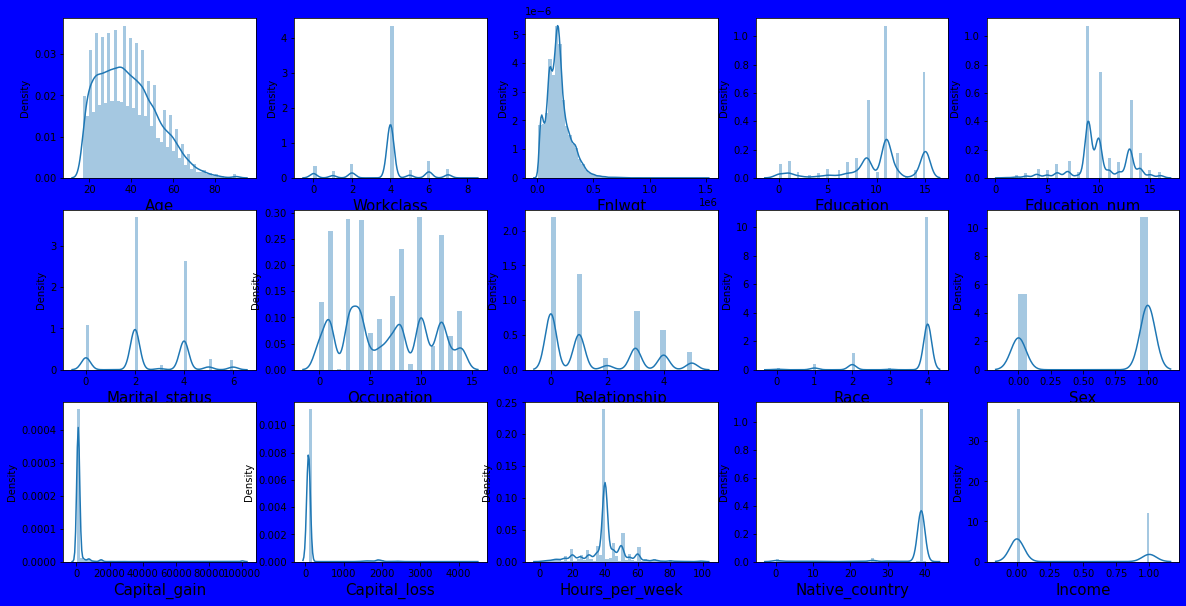

In [55]:
plt.figure(figsize=(20,10), facecolor='blue')
plotnumber=1

for column in data:
    if plotnumber<=15 :
        ax= plt.subplot(3,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [51]:
data['Capital_loss']=data['Capital_loss'].replace(0,data['Capital_loss'].mean())

In [52]:
data['Capital_gain']=data['Capital_gain'].replace(0,data['Capital_gain'].mean())

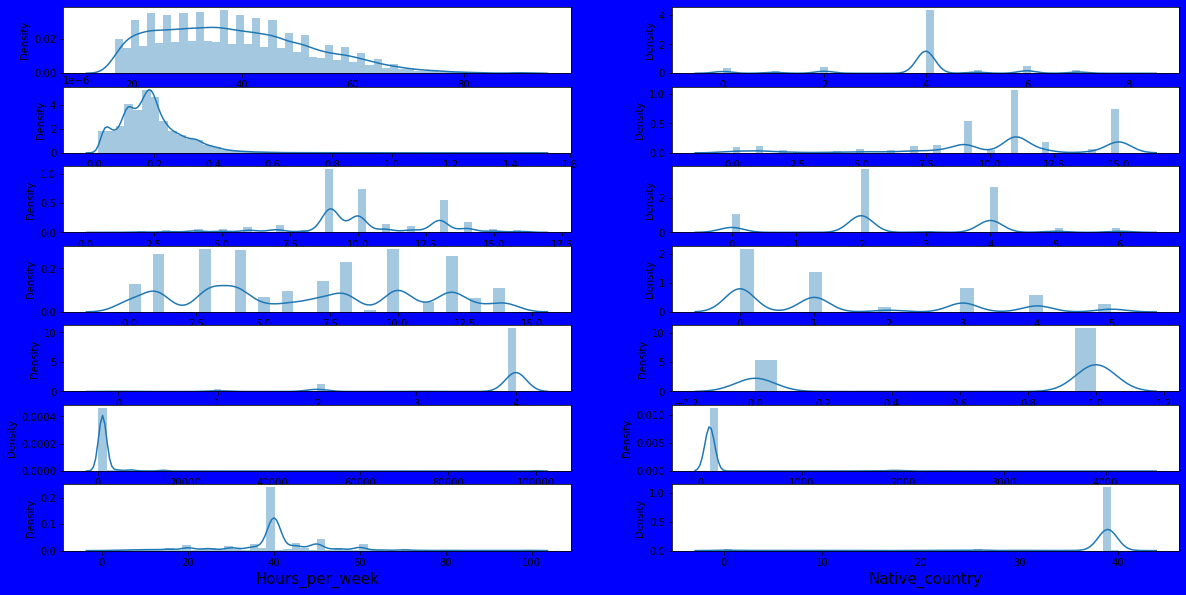

In [57]:
plt.figure(figsize=(20,10), facecolor='blue')
plotnumber=1

for column in data:
    if plotnumber<=14 :
        ax= plt.subplot(7,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [60]:
data.drop('Capital_loss',axis=1,inplace=True)

In [61]:
data.drop('Capital_gain',axis=1,inplace=True)

In [63]:
data.shape

(32560, 12)

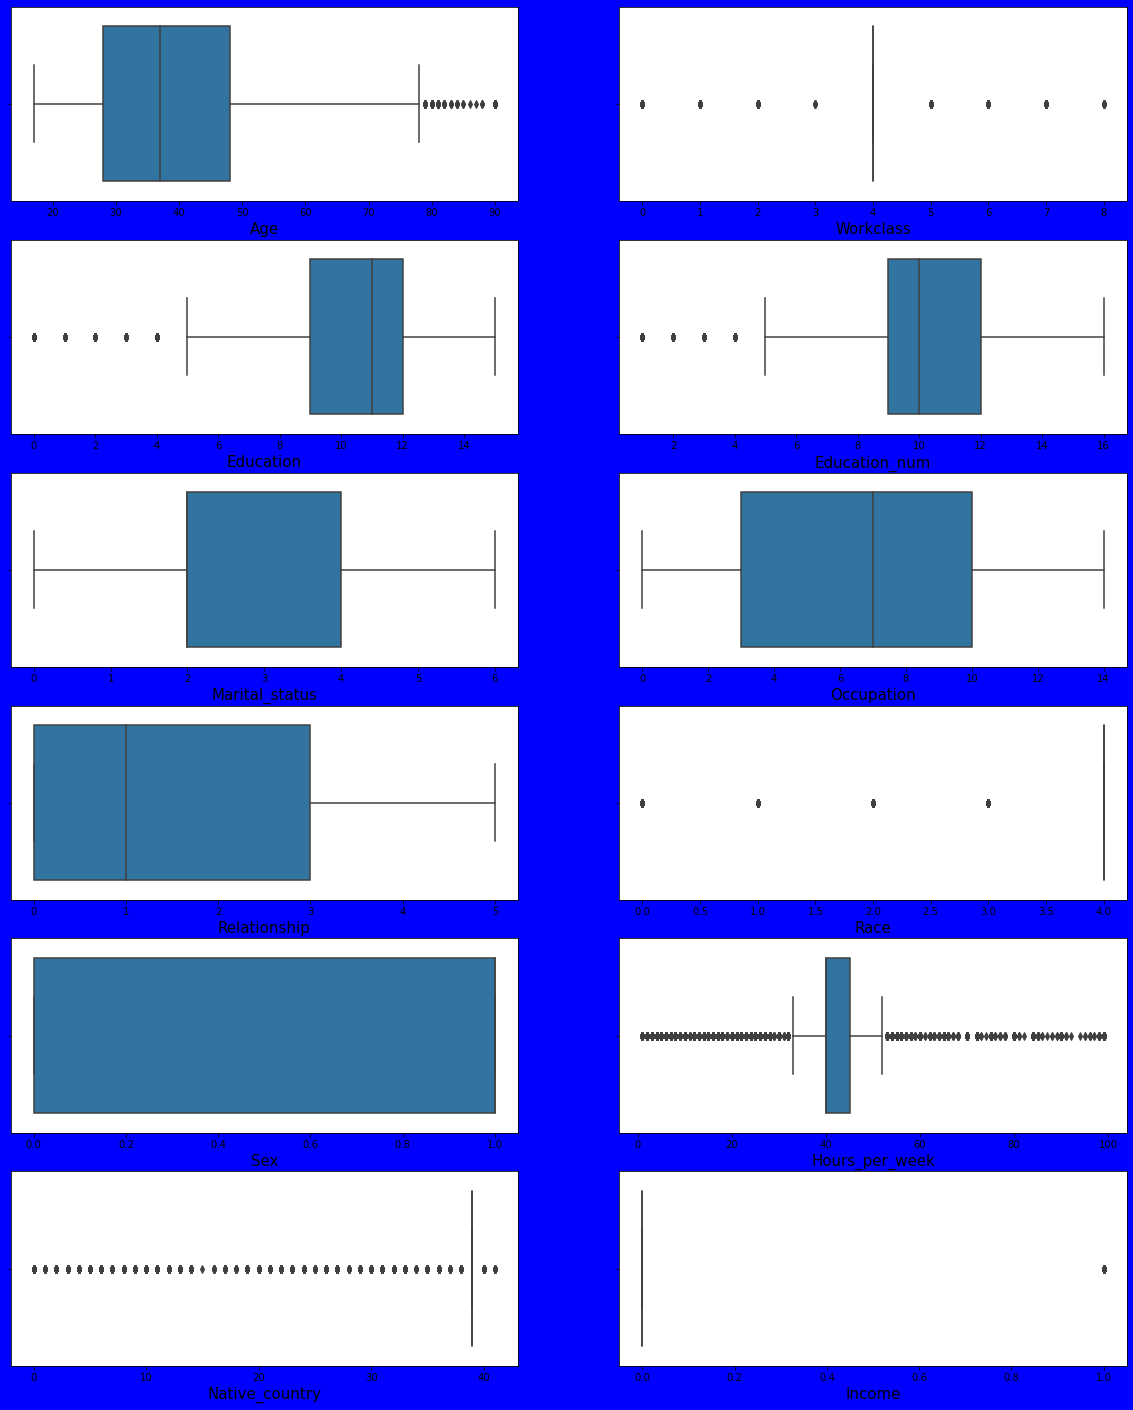

In [68]:
plt.figure(figsize=(20,25), facecolor='blue')
plotnumber=1

for column in data:
    if plotnumber<=12 :
        ax= plt.subplot(6,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [69]:
#age, education, education num, hours per week
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

In [70]:
age_high= (q3.Age+(1.5*iqr.Age))
print(age_high)

index=np.where(data['Age']>age_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

78.0
(32417, 12)


,index,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,0,50,6,9,13,2,4,0,4,1,13,39,0
1,1,38,4,11,9,0,6,1,4,1,40,39,0
2,2,53,4,1,7,2,6,0,2,1,40,39,0
3,3,28,4,9,13,2,10,5,2,0,40,5,0
4,4,37,4,12,14,2,4,5,4,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32412,32555,27,4,7,12,2,13,5,4,0,38,39,0
32413,32556,40,4,11,9,2,7,0,4,1,40,39,1
32414,32557,58,4,11,9,6,1,4,4,0,40,39,0
32415,32558,22,4,11,9,4,1,3,4,1,20,39,0


In [73]:
Education_high= (q3.Education+(1.5*iqr.Education))
print(Education_high)

index=np.where(data['Education']>Education_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

16.5
(28934, 11)


,index,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,0,50,6,9,2,4,0,4,1,13,39,0
1,1,38,4,11,0,6,1,4,1,40,39,0
2,2,53,4,1,2,6,0,2,1,40,39,0
3,3,28,4,9,2,10,5,2,0,40,5,0
4,4,37,4,12,2,4,5,4,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
28929,32555,27,4,7,2,13,5,4,0,38,39,0
28930,32556,40,4,11,2,7,0,4,1,40,39,1
28931,32557,58,4,11,6,1,4,4,0,40,39,0
28932,32558,22,4,11,4,1,3,4,1,20,39,0


In [71]:
Hours_per_week_high= (q3.Hours_per_week+(1.5*iqr.Hours_per_week))
print(age_high)

index=np.where(data['Hours_per_week']>Hours_per_week_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

78.0
(28934, 12)


,index,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,0,50,6,9,13,2,4,0,4,1,13,39,0
1,1,38,4,11,9,0,6,1,4,1,40,39,0
2,2,53,4,1,7,2,6,0,2,1,40,39,0
3,3,28,4,9,13,2,10,5,2,0,40,5,0
4,4,37,4,12,14,2,4,5,4,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28929,32555,27,4,7,12,2,13,5,4,0,38,39,0
28930,32556,40,4,11,9,2,7,0,4,1,40,39,1
28931,32557,58,4,11,9,6,1,4,4,0,40,39,0
28932,32558,22,4,11,9,4,1,3,4,1,20,39,0


In [72]:
data.drop('Education_num',axis=1,inplace=True)

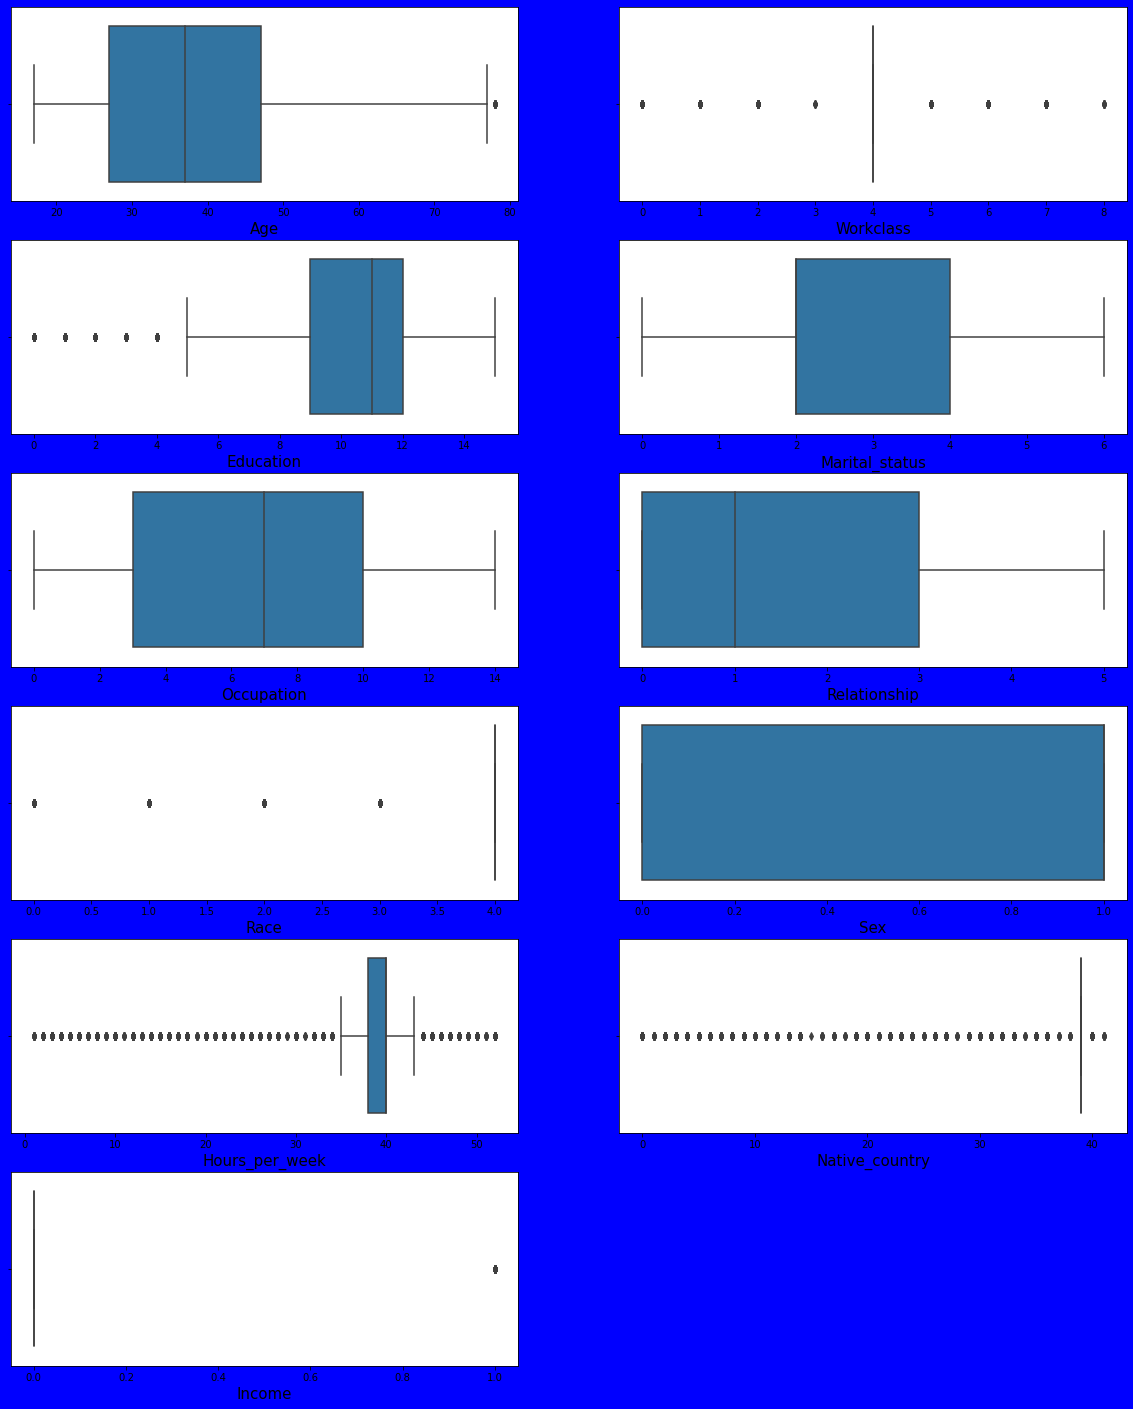

In [74]:
plt.figure(figsize=(20,25), facecolor='blue')
plotnumber=1

for column in data:
    if plotnumber<=12 :
        ax= plt.subplot(6,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [75]:
Education_high= (q1.Education-(1.5*iqr.Education))
print(Education_high)

index=np.where(data['Education']<Education_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

4.5
(26107, 11)


,index,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,0,50,6,9,2,4,0,4,1,13,39,0
1,1,38,4,11,0,6,1,4,1,40,39,0
2,3,28,4,9,2,10,5,2,0,40,5,0
3,4,37,4,12,2,4,5,4,0,40,39,0
4,5,49,4,6,3,8,1,2,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...
26102,32555,27,4,7,2,13,5,4,0,38,39,0
26103,32556,40,4,11,2,7,0,4,1,40,39,1
26104,32557,58,4,11,6,1,4,4,0,40,39,0
26105,32558,22,4,11,4,1,3,4,1,20,39,0


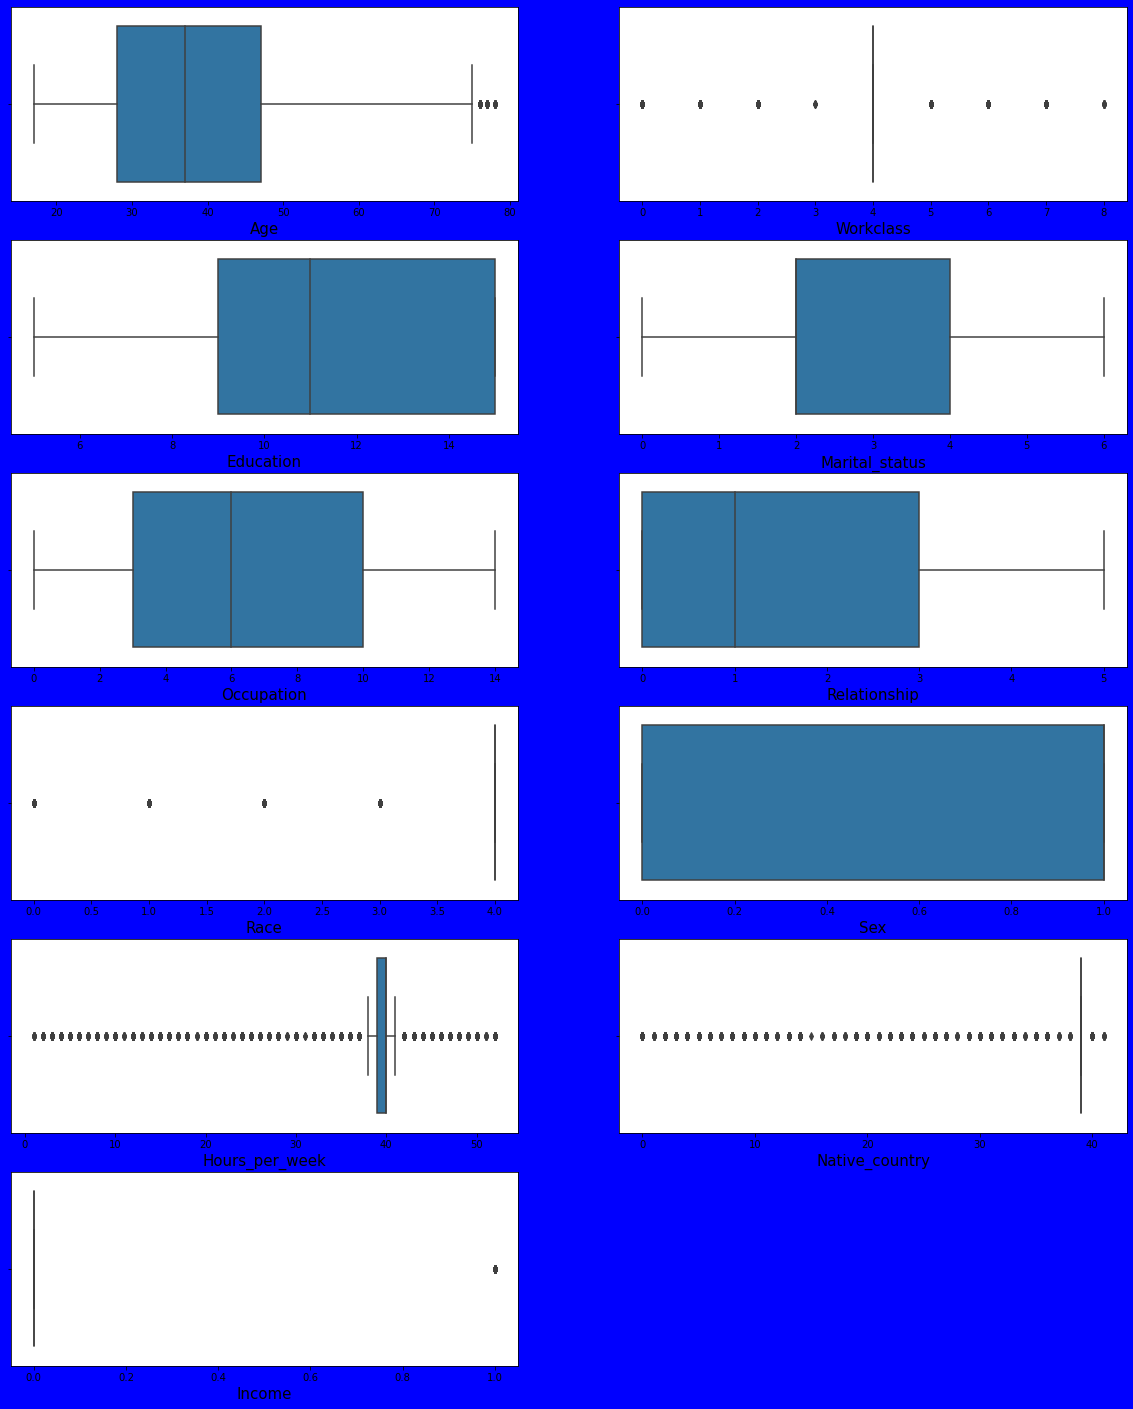

In [76]:
plt.figure(figsize=(20,25), facecolor='blue')
plotnumber=1

for column in data:
    if plotnumber<=12 :
        ax= plt.subplot(6,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [77]:
age_high= (q1.Age-(1.5*iqr.Age))
print(age_high)

index=np.where(data['Age']<age_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

-2.0
(26107, 11)


,index,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,0,50,6,9,2,4,0,4,1,13,39,0
1,1,38,4,11,0,6,1,4,1,40,39,0
2,3,28,4,9,2,10,5,2,0,40,5,0
3,4,37,4,12,2,4,5,4,0,40,39,0
4,5,49,4,6,3,8,1,2,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...
26102,32555,27,4,7,2,13,5,4,0,38,39,0
26103,32556,40,4,11,2,7,0,4,1,40,39,1
26104,32557,58,4,11,6,1,4,4,0,40,39,0
26105,32558,22,4,11,4,1,3,4,1,20,39,0


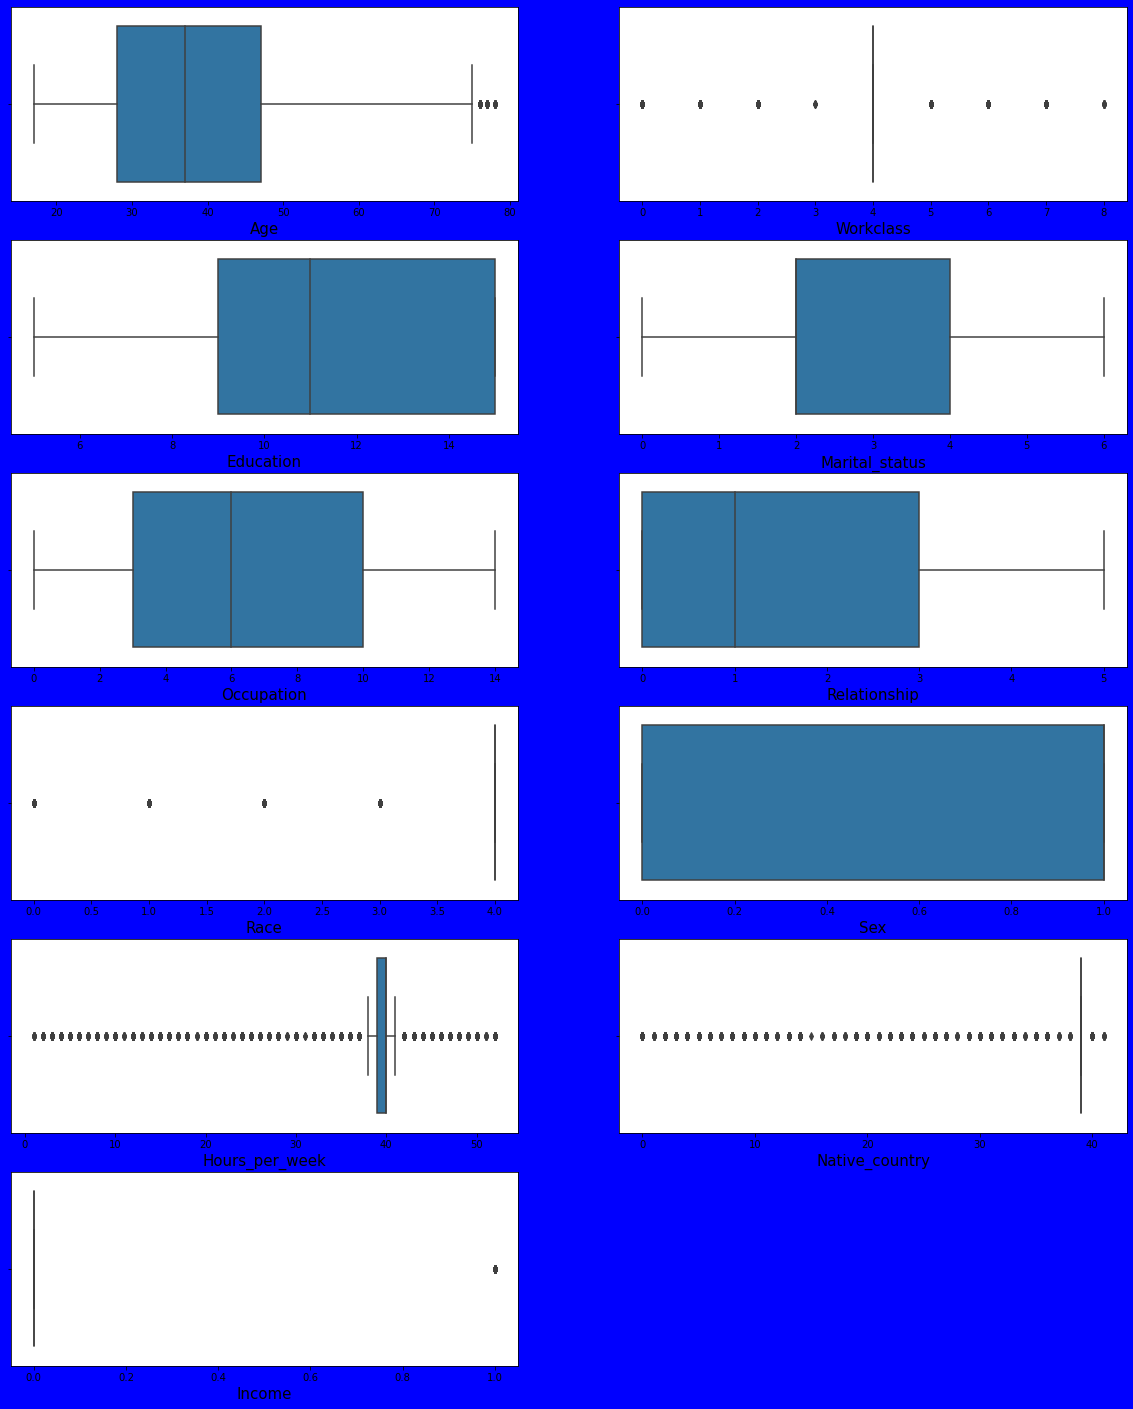

In [78]:
plt.figure(figsize=(20,25), facecolor='blue')
plotnumber=1

for column in data:
    if plotnumber<=12 :
        ax= plt.subplot(6,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [79]:
Hours_per_week_high= (q1.Hours_per_week-(1.5*iqr.Hours_per_week))
print(age_high)

index=np.where(data['Hours_per_week']<Hours_per_week_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

-2.0
(21589, 11)


,index,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,1,38,4,11,0,6,1,4,1,40,39,0
1,3,28,4,9,2,10,5,2,0,40,5,0
2,4,37,4,12,2,4,5,4,0,40,39,0
3,6,52,6,11,2,4,0,4,1,45,39,1
4,7,31,4,12,4,10,1,4,0,50,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...
21584,32554,22,4,15,4,11,1,4,1,40,39,0
21585,32555,27,4,7,2,13,5,4,0,38,39,0
21586,32556,40,4,11,2,7,0,4,1,40,39,1
21587,32557,58,4,11,6,1,4,4,0,40,39,0


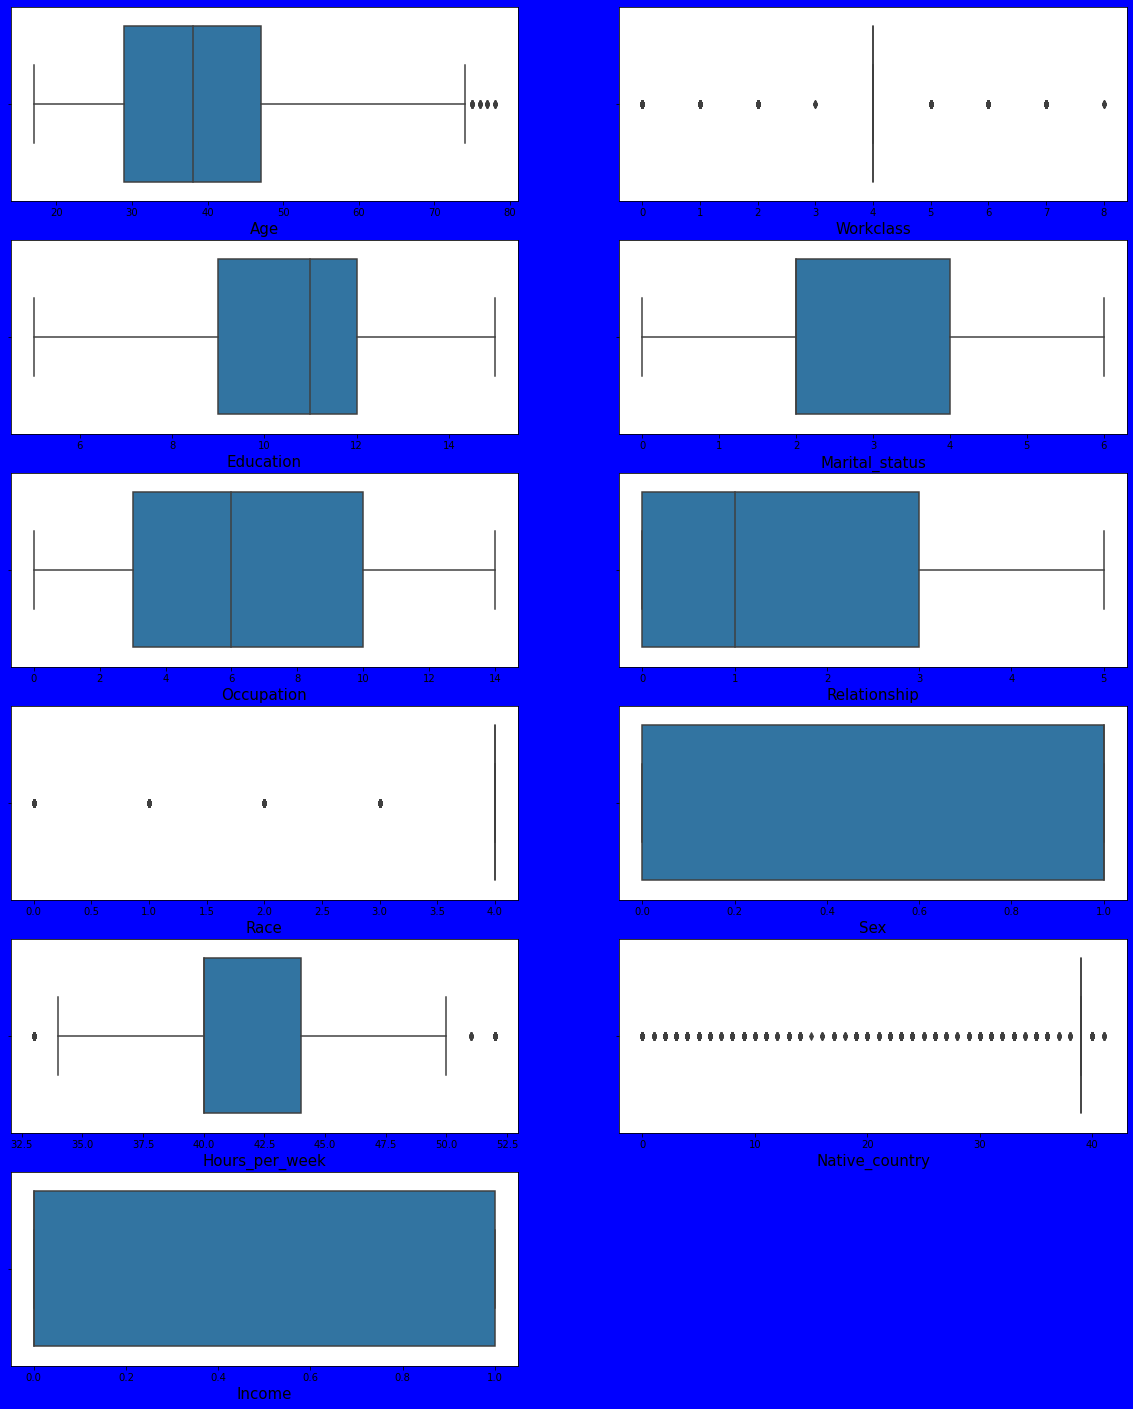

In [80]:
plt.figure(figsize=(20,25), facecolor='blue')
plotnumber=1

for column in data:
    if plotnumber<=12 :
        ax= plt.subplot(6,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [81]:
x=data.drop(columns=['Income'])
y=data['Income']

In [82]:
scalar=StandardScaler()
x_scaled= scalar.fit_transform(x)

In [83]:
x_scaled.shape

(21589, 10)

In [84]:
x_train,x_test,y_train,y_test= train_test_split(x_scaled,y,test_size=0.25,random_state=264)

In [85]:
LR=LogisticRegression()

In [86]:
LR.fit(x_train,y_train)

LogisticRegression()

In [87]:
y_pred=LR.predict(x_test)

In [88]:
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [89]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7412004446091145

In [90]:
CF=confusion_matrix(y_test,y_pred)
CF

array([[3644,  364],
       [1033,  357]], dtype=int64)

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      4008
           1       0.50      0.26      0.34      1390

    accuracy                           0.74      5398
   macro avg       0.64      0.58      0.59      5398
weighted avg       0.71      0.74      0.71      5398



In [94]:
auc_score=roc_auc_score(y_test,y_pred)
auc_score

0.5830080845503239